# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline
plt.style.use('ggplot')


        Probability of winning switching doors: 0.6736736736736737
        Probability of winning keeping the same choice: 0.3263263263263263


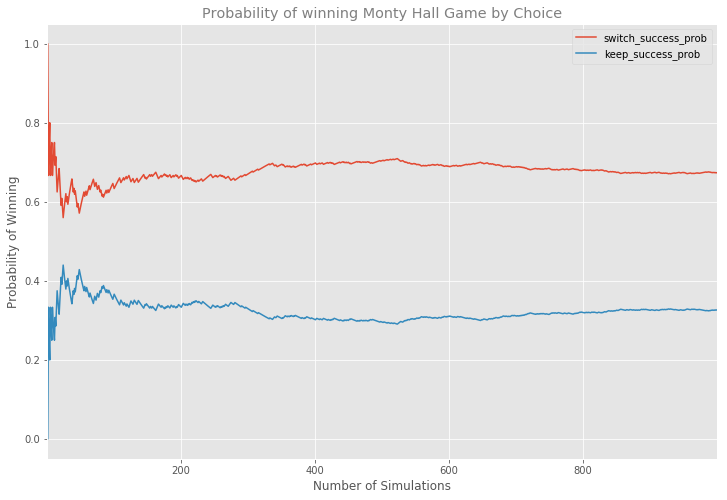

In [20]:
# Generate Numbers
# Pick door
# Pick goat
# Get prob of winning if switch choice, not switch choice
# Log data with simulation #
data = {}
num_simulations = 1000
switch_successes = 0
keep_successes = 0

for sim in range(1, num_simulations):
    car_door = np.random.randint(1,4)
    player_choice = np.random.randint(1,4)
    reveal_options = [door for door in [1,2,3] if door not in [car_door, player_choice]]
    revealed = random.sample(reveal_options, 1)
    if player_choice == car_door:
        keep_successes += 1
    else:
        switch_successes += 1
    switch_success_prob = switch_successes / sim
    keep_success_prob = keep_successes / sim
    data[sim] = {'switch_success_prob': switch_success_prob, 'keep_success_prob': keep_success_prob}
    
    #print(f"""
    #car_door : {car_door}
    #player_choice : {player_choice} 
    #reveal_options : {reveal_options}
    #revealed : {revealed}""")
    #if sim >= 1:
    #    break
    if sim == num_simulations - 1:
        print(f"""
        Probability of winning switching doors: {switch_success_prob}
        Probability of winning keeping the same choice: {keep_success_prob}""")

df = pd.DataFrame.from_dict(data, orient='index')
df.plot(figsize=(12,8))
plt.xlabel("Number of Simulations")
plt.ylabel("Probability of Winning")
plt.title("Probability of winning Monty Hall Game by Choice", color='gray')
plt.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 

In [22]:
# Proof with Bayes Theorem:
# Most important to note that the Probability of Monty choosing a door with a goat behind it is 1
# Want to know the Prob_win_without_switching_given_monty_shows_goat
# a win without switching is the same as the first door choice being correct
# P(1st_choice_correct | monty_reveals_goat) = P(monty_reveals_goat|1st_choice_correct)P(1st_choice_correct) / P(monty_reveals_goat)
P_1st_choice_correct = 1/3
P_1st_choice_incorrect = 2/3
P_monty_reveals_goat_given_1st_choice_correct = 1
P_monty_reveals_goat_given_1st_choice_incorrect = 1
# This will be 1 but it is laid out for clarity
P_monty_reveals_goat = ((P_monty_reveals_goat_given_1st_choice_correct * P_1st_choice_correct)
                        + (P_monty_reveals_goat_given_1st_choice_incorrect * P_1st_choice_incorrect))
P_1st_choice_correct_given_monty_reveals_goat = ((P_monty_reveals_goat_given_1st_choice_correct
                                                 * P_1st_choice_correct) / P_monty_reveals_goat)

print("""According to Bayes' Theorem, the probability of winning when sticking with the first 
choice of door is {}""".format(P_1st_choice_correct_given_monty_reveals_goat))
print("""Since there is only one other door to switch to, the probability of winning when 
switching to the new door is then {}""".format(1-P_1st_choice_correct_given_monty_reveals_goat))

According to Bayes' Theorem, the probability of winning when sticking with the first 
choice of door is 0.3333333333333333
Since there is only one other door to switch to, the probability of winning when 
switching to the new door is then 0.6666666666666667
